In [1144]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

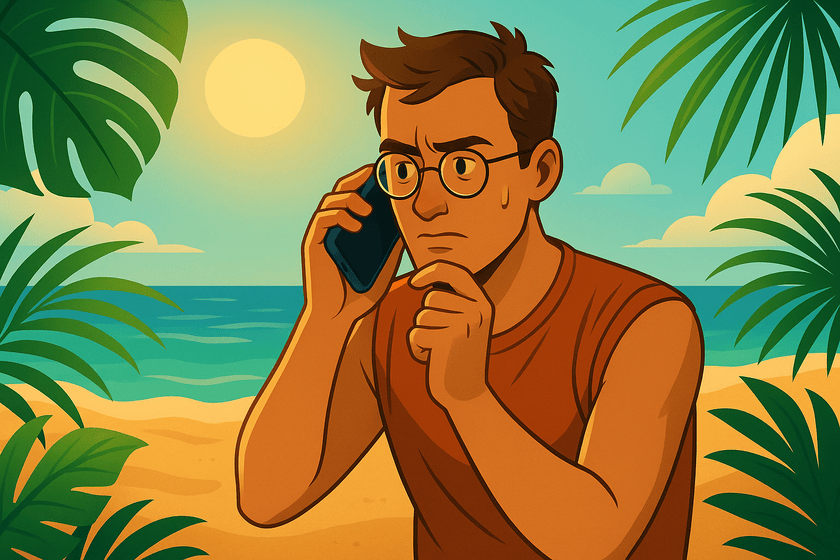

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [1146]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# Setup i czyszczenie danych

## Przejrzenie datasetu

In [1147]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1148]:
titanic_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,793.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,33.123938,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,51.578312,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [1149]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [1150]:
titanic_df.isna().sum() / titanic_df.shape[0] * 100

,0
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,10.998878
Cabin,77.104377


Braki w kolumnach Age i Fare są znaczące, więc chcę uniknąć zastępowania ich średnią lub medianą. Embarked mogę zastąpić modą, ze względu na charakter kategoryczny. Cabin jest większym problemem.

In [1151]:
duplicates_in_columns = titanic_df.apply(lambda x: x.duplicated().sum())
duplicates_in_columns

,0
Survived,889
Pclass,888
Name,0
Sex,889
Age,802
SibSp,884
Parch,884
Ticket,210
Fare,654
Cabin,743


## Analiza kolumny Age i jej uzupełnienie

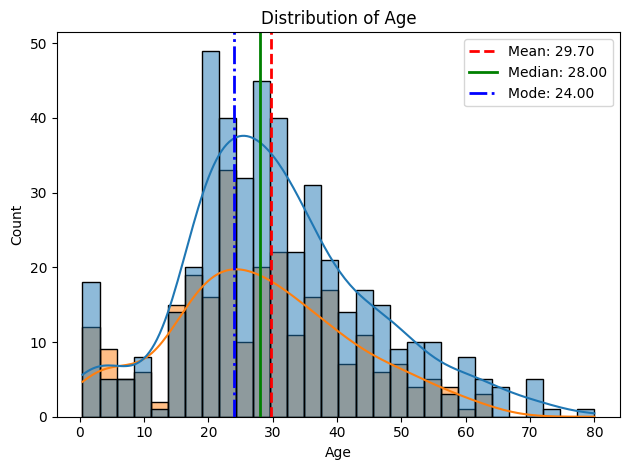

In [1152]:
def show_column_dist(df, col, by=None):
  mean_val = df[col].mean()
  median_val = df[col].median()
  mode_val = df[col].mode()[0]

  sns.histplot(df, x=col, bins = 30, kde=True, hue=by)
  plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
  plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
  plt.axvline(mode_val, color='blue', linestyle='-.', linewidth=2, label=f'Mode: {mode_val:.2f}')
  plt.legend()
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

show_column_dist(titanic_df, 'Age', by='Sex')

Rozkład wieku jest rozkładem normalnym, przesuniętym w lewo z dużym spadkiem wieku do 18 w dół. Uzupełniam kolumnę Age względem rozkłądu wieku. Nie ma powiązania z płcią.

In [1153]:
age_prob = titanic_df['Age'].value_counts(normalize=True)
age_prob

,proportion
Age,
24.00,0.042017
22.00,0.037815
18.00,0.036415
28.00,0.035014
30.00,0.035014
...,...
24.50,0.001401
0.67,0.001401
0.42,0.001401


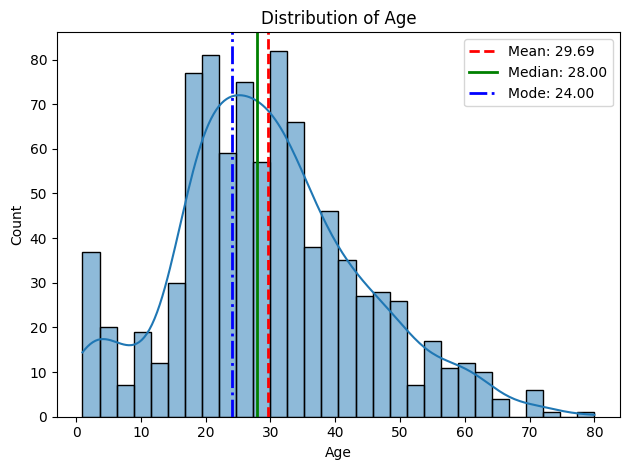

In [1154]:
missing_age_indexes = titanic_df['Age'].isna()
titanic_df.loc[missing_age_indexes, 'Age'] = np.random.choice(age_prob.index, size=missing_age_indexes.sum(), p=age_prob)
# wartosci float zaokraglam do gory
titanic_df['Age'] = np.ceil(titanic_df['Age']).astype(int)
# Oczyszczone dane:
show_column_dist(titanic_df, 'Age')

## Sprawdzenie zależności ceny biletów do klas i przeżywalności.

<Axes: >

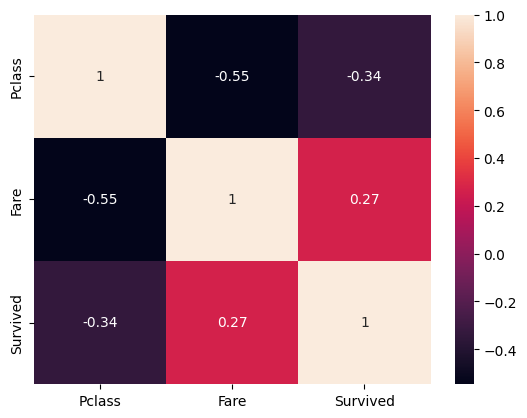

In [1155]:
corr_matrix = titanic_df[['Pclass', 'Fare', 'Survived']].corr()
sns.heatmap(corr_matrix, annot=True)

## Pclass ma dość duże powiązanie z Fare.

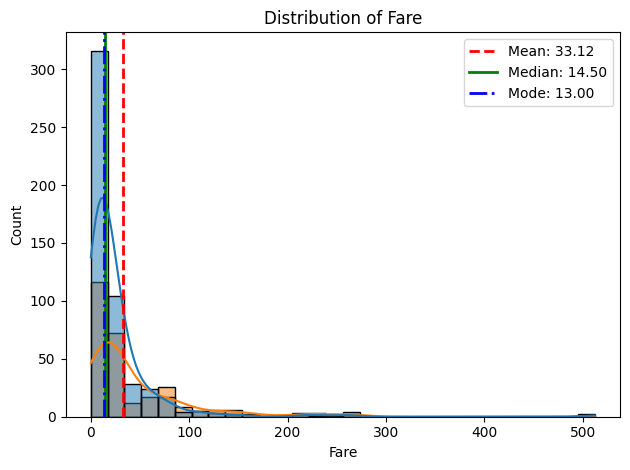

In [1156]:
show_column_dist(titanic_df, 'Fare', by='Sex')

Rozkład jesy wyraźnie asymetryczny, a dane są numeryczne i ciągłe, więc uzupełniam medianą względem każdej klasy biletu.

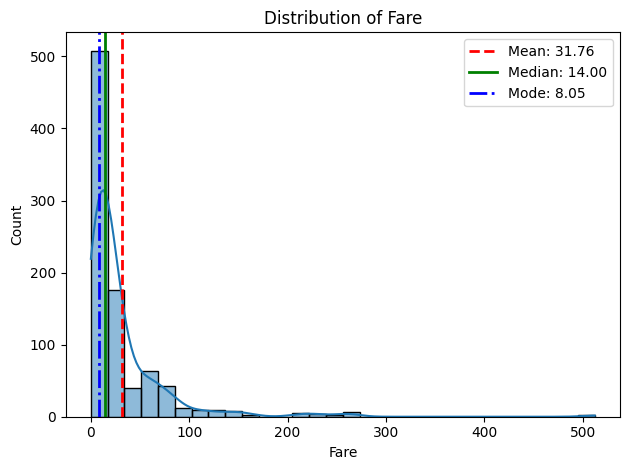

In [1157]:
grouped_pclass = titanic_df.groupby('Pclass')['Fare'].median()
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Pclass'].map(grouped_pclass))
show_column_dist(titanic_df, 'Fare')

<Axes: ylabel='Fare'>

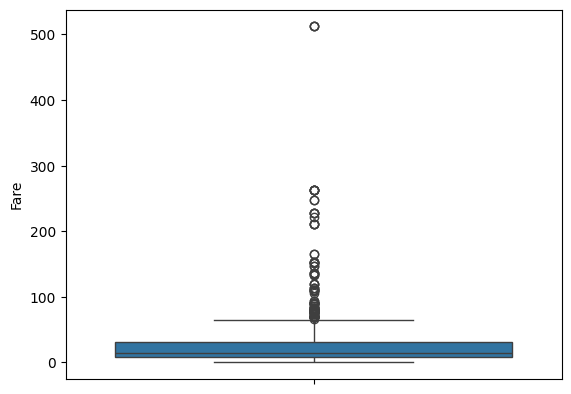

In [1158]:
sns.boxplot(titanic_df['Fare'])

Wartości skrajne są zbyt duże, lepiej nanieść logarytm.

<Axes: ylabel='Fare'>

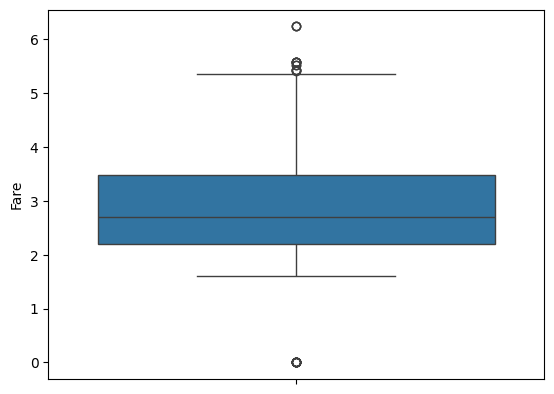

In [1159]:
titanic_df['Fare'] = np.log1p(titanic_df['Fare'])
sns.boxplot(titanic_df['Fare'])

## Poprawa Embarked

In [1160]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


## Zakodowanie kolumn Sex i Embarked.

In [1161]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

In [1162]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1163]:
titanic_df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [1164]:
titanic_df.groupby('Embarked')['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [1165]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


## Dodanie tytułu i usunięcie Name. W Title bedzie zakodowany autorytet na statku.

In [1166]:
titanic_df['Title'] = titanic_df['Name'].str.extract(r'([A-Za-z]+)\.')
titanic_df = titanic_df.drop(columns=['Name'])
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1167]:
title_map = {
    'Master': 1,
    'Miss': 2,
    'Mlle': 2,
    'Mr': 3,
    'Mrs': 3,
    'Ms': 3,
    'Mme': 3,
    'Rev': 4,
    'Dr': 5,
    'Don': 5,
    'Sir': 6,
    'Lady': 6,
    'Countess': 6,
    'Jonkheer': 6,
    'Major': 7,
    'Col': 7,
    'Capt': 8
}

titanic_df['Title'] = titanic_df['Title'].map(title_map).astype(int)



In [1168]:
titanic_df.groupby('Title')['Survived'].mean().sort_values()

,Survived
Title,
4,0.000000
8,0.000000
3,0.282609
5,0.375000
7,0.500000
1,0.575000
2,0.701087
6,0.750000


In [1169]:
age_bins = [0, 18, 35, 60, 120]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)
titanic_df.groupby('AgeGroup')['Survived'].mean().sort_values()

/tmp/ipython-input-4264679624.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('AgeGroup')['Survived'].mean().sort_values()


,Survived
AgeGroup,
Senior,0.230769
Young Adult,0.365854
Adult,0.386831
Child,0.450292


In [1170]:
age_map = {
    'Senior' : 3,
    'Adult' : 2,
    'Young Adult' : 1,
    'Child' : 0
}

titanic_df['AgeGroup'] = titanic_df['AgeGroup'].map(age_map).astype(int)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,male,22,1,0,A/5 21171,2.110213,NaN,S,3,1
2,1,1,female,38,1,0,PC 17599,4.280593,C85,C,3,2
3,1,3,female,26,0,0,STON/O2. 3101282,2.188856,NaN,S,2,1
4,1,1,female,35,1,0,113803,3.990834,C123,S,3,1
5,0,3,male,35,0,0,373450,2.202765,NaN,S,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,211536,2.639057,NaN,S,4,1
888,1,1,female,19,0,0,112053,3.433987,B42,S,2,1
889,0,3,female,29,1,2,W./C. 6607,3.196630,NaN,S,2,1


In [1171]:
titanic_df['Family'] = titanic_df['Parch'] + titanic_df['SibSp']

In [1172]:
titanic_df['Cabin_Known'] = titanic_df.apply(lambda x: 'No' if pd.isna(x['Cabin']) else 'Yes', axis=1)
titanic_df = titanic_df.drop(columns=['Ticket', 'Cabin'])
titanic_df_copy = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked', 'Cabin_Known'])
titanic_df_copy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,AgeGroup,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Known_No,Cabin_Known_Yes
PassengerId,,,,,,,,,,,,,,,,
1,0,3,22,1,0,2.110213,3,1,1,False,True,False,False,True,True,False
2,1,1,38,1,0,4.280593,3,2,1,True,False,True,False,False,False,True
3,1,3,26,0,0,2.188856,2,1,0,True,False,False,False,True,True,False
4,1,1,35,1,0,3.990834,3,1,1,True,False,False,False,True,False,True
5,0,3,35,0,0,2.202765,3,1,0,False,True,False,False,True,True,False


In [1173]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,Family,Cabin_Known
PassengerId,,,,,,,,,,,,
1,0,3,male,22,1,0,2.110213,S,3,1,1,No
2,1,1,female,38,1,0,4.280593,C,3,2,1,Yes
3,1,3,female,26,0,0,2.188856,S,2,1,0,No
4,1,1,female,35,1,0,3.990834,S,3,1,1,Yes
5,0,3,male,35,0,0,2.202765,S,3,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,2.639057,S,4,1,0,No
888,1,1,female,19,0,0,3.433987,S,2,1,0,Yes
889,0,3,female,29,1,2,3.196630,S,2,1,3,No


<Axes: >

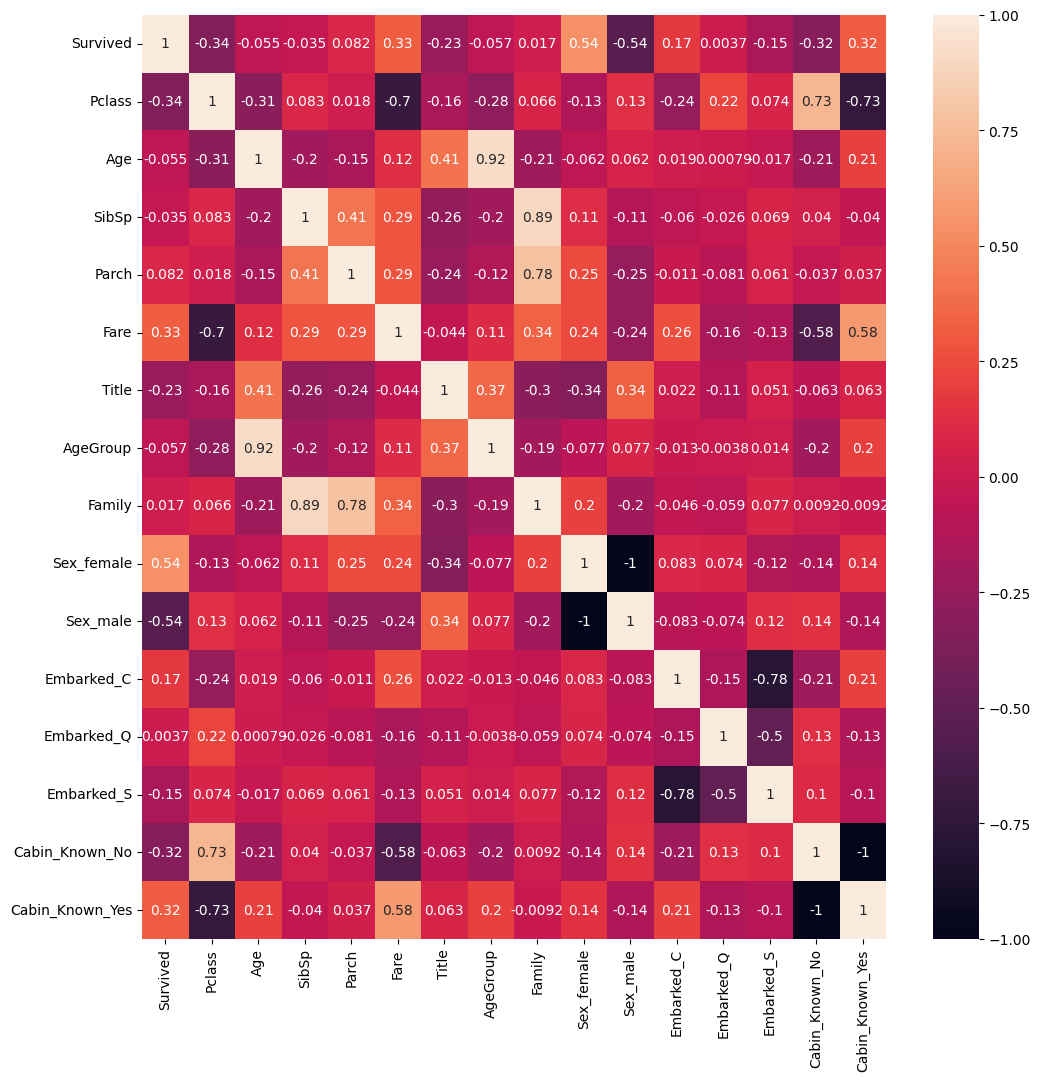

In [1174]:
corr = titanic_df_copy.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)

Największe powiązanie z Survived mają kolumny: Sex, Pclass, Cabin_Known, Fare i Title. Później można jeszcze zauważyć niewielkie powiązanie Embarked.

Dane są oczyszczone i zakodowane.

# Wykresy i analiza

In [1175]:
titanic_df_copy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,AgeGroup,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Known_No,Cabin_Known_Yes
PassengerId,,,,,,,,,,,,,,,,
1,0,3,22,1,0,2.110213,3,1,1,False,True,False,False,True,True,False
2,1,1,38,1,0,4.280593,3,2,1,True,False,True,False,False,False,True
3,1,3,26,0,0,2.188856,2,1,0,True,False,False,False,True,True,False
4,1,1,35,1,0,3.990834,3,1,1,True,False,False,False,True,False,True
5,0,3,35,0,0,2.202765,3,1,0,False,True,False,False,True,True,False


Jaka część osób przeżyła?

In [1176]:
np.round(titanic_df['Survived'].sum() / titanic_df.shape[0] * 100)

np.float64(38.0)

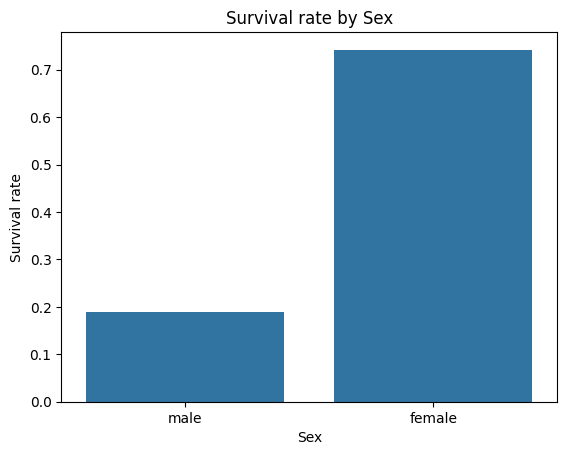

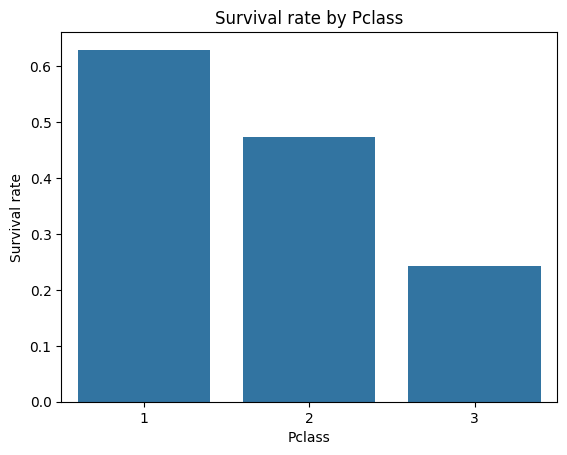

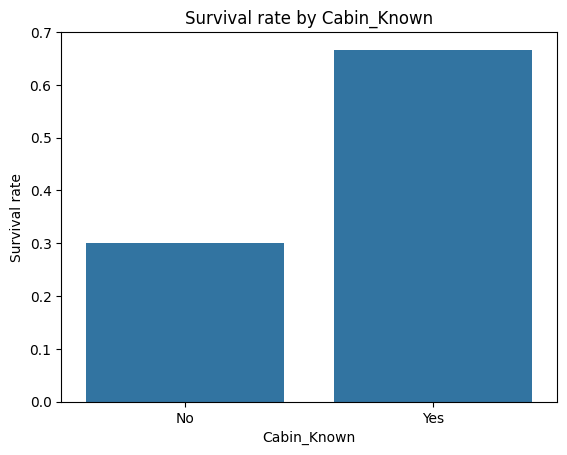

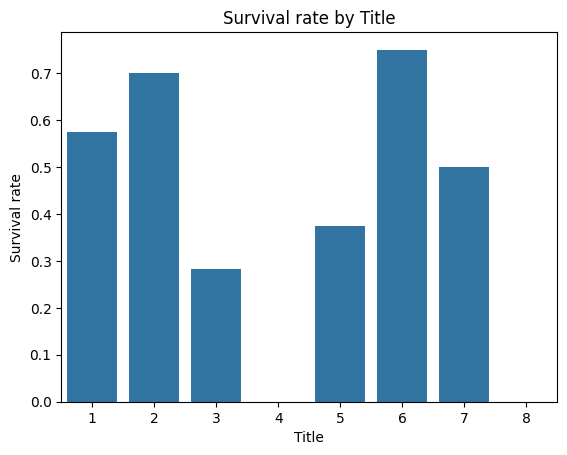

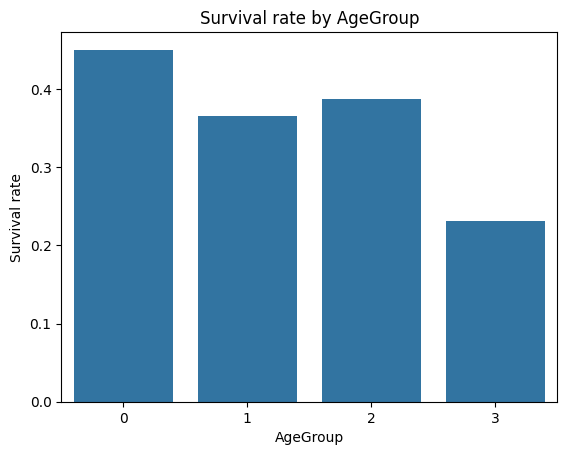

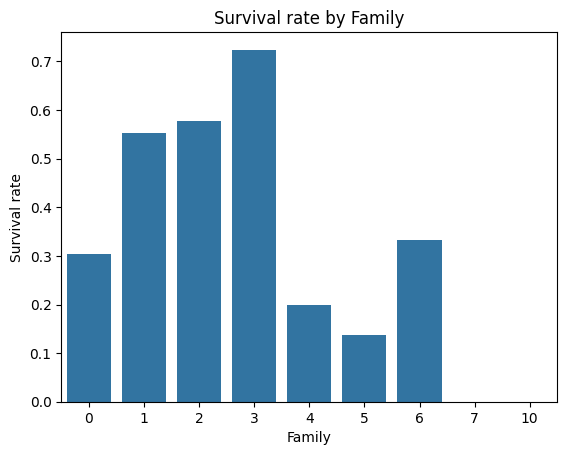

In [1177]:
for col in ['Sex', 'Pclass', 'Cabin_Known', 'Title', 'AgeGroup', 'Family']:
  sns.barplot(titanic_df, x=col, y='Survived', errorbar=None)
  plt.title(f'Survival rate by {col}')
  plt.ylabel('Survival rate')
  plt.show()

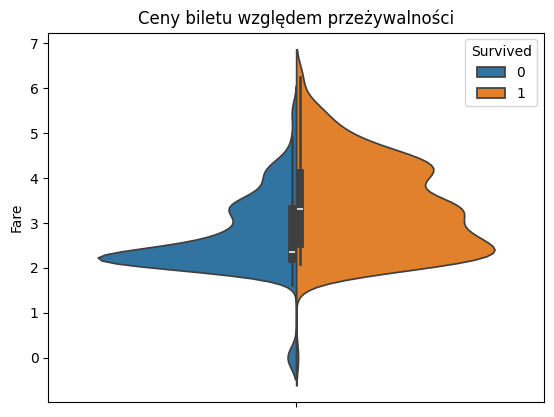

In [1178]:
sns.violinplot(titanic_df, y='Fare', hue='Survived', split=True)
plt.title('Ceny biletu względem przeżywalności')
plt.show()

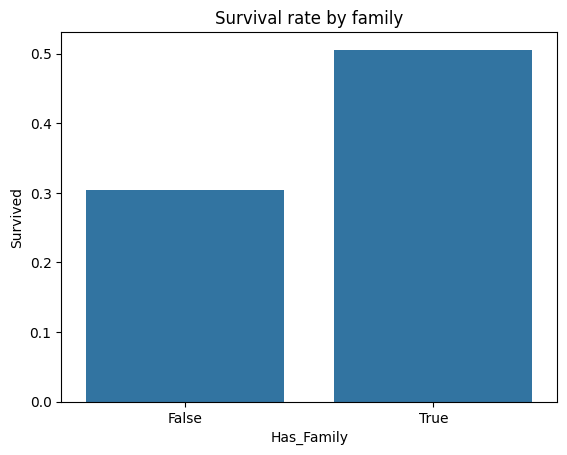

In [1179]:
titanic_df['Has_Family'] = titanic_df['Family'] > 0
grouped_family = titanic_df.groupby('Has_Family')['Survived'].size()
sns.barplot(titanic_df, x='Has_Family', y='Survived', errorbar=None)
plt.title('Survival rate by family')
plt.show()

Wnioski:

*   Znacznie więcej kobiet przeżyło
*   Osoby z wyższych klas częściej przeżywały
*   Osoby ze znanymi danymi na temat kabiny częściej przeżywały
*   Wraz z rosnącą grupą wiekową, malała przeżywalność
*   Osoby, które więcej płaciły za bilet częściej przeżywały
*   Osoby mające rodzine na pokładzie znacznie częściej przeżywały



## Outliners

In [1180]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,Family,Cabin_Known,Has_Family
PassengerId,,,,,,,,,,,,,
1,0,3,male,22,1,0,2.110213,S,3,1,1,No,True
2,1,1,female,38,1,0,4.280593,C,3,2,1,Yes,True
3,1,3,female,26,0,0,2.188856,S,2,1,0,No,False
4,1,1,female,35,1,0,3.990834,S,3,1,1,Yes,True
5,0,3,male,35,0,0,2.202765,S,3,1,0,No,False


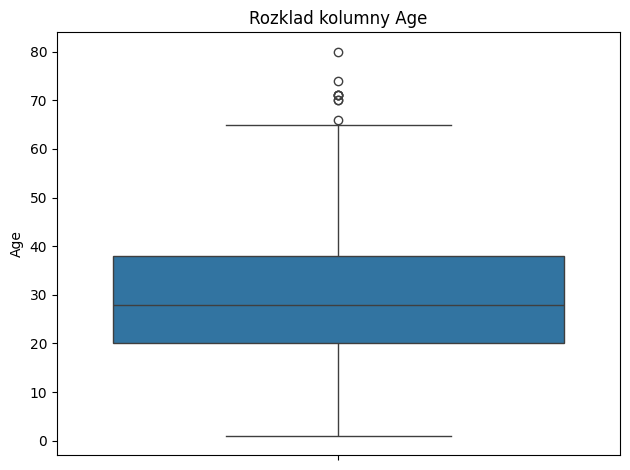

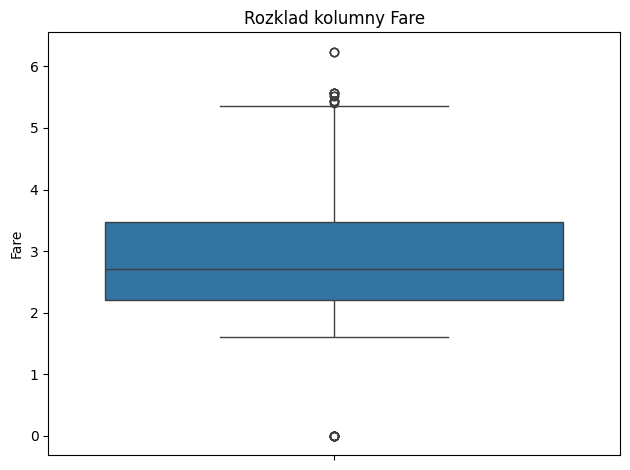

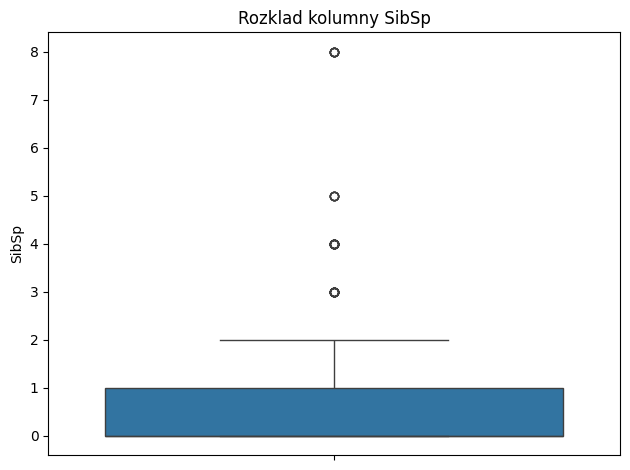

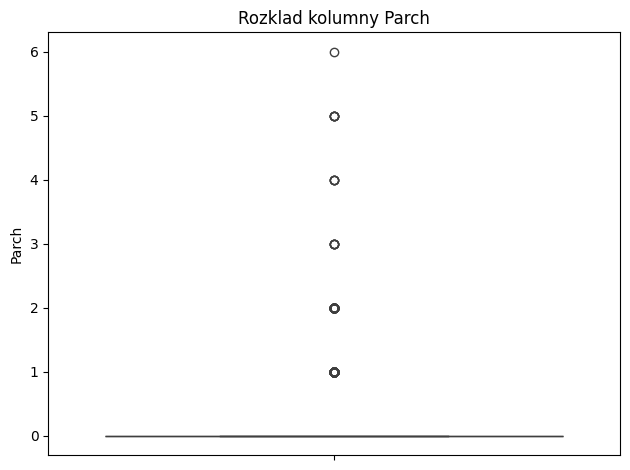

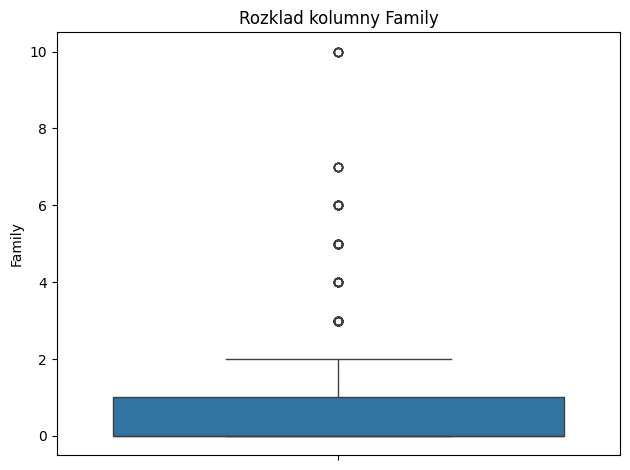

In [1181]:
for col in ['Age', 'Fare', 'SibSp', 'Parch', 'Family']:
  sns.boxplot(titanic_df[col])
  plt.title(f'Rozklad kolumny {col}')
  plt.tight_layout()
  plt.show()

Wiele outlinerów można zobaczyć w kolumnach Age i Fare. W Age większość stanowią dorośli pomiędzy 20-40 lat, ale nadal w danych występują dzieci i seniorzy. W kolumnie Fare po zastosowaniu logarytmu widać nadal skupisko wartości średnich i pare odstających wartości bardzo drogich biletów. Rozkład kolumny Family jest bardzo asymetryczny, znaczna większość miała 0-2 członków rodziny na pokładzie.